![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/train_set.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [5]:
# Convierto las columnas que son object a numéricas:
df_string = df[df.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
df_string

,2,4,6,7,8,12,13,15,17
0,0,0,2,2,5,2,2,2,0
1,0,0,2,1,5,1,2,5,2
2,2,2,1,3,5,2,2,7,1
3,5,1,2,3,1,0,2,1,5
4,0,0,2,3,4,2,2,5,5
...,...,...,...,...,...,...,...,...,...
99995,0,1,2,2,1,0,2,5,10
99996,1,0,2,2,5,2,2,2,5
99997,0,0,2,1,5,1,1,3,3
99998,5,1,2,3,1,1,2,4,1


In [6]:
# Para poder volver a crear mi dataset completo, del dataframe original me quedo con todas las columnas que no son object
df_no_string = df[df.select_dtypes(exclude='object').columns]
df_no_string

,0,1,3,5,9,10,11,14,16
0,161528,6,6,2,4.0,45810,2.0,2,2817.0
1,159472,23,6,4,2.0,128565,15.0,4,4498.0
2,309765,2,5,2,3.0,46565,5.0,2,4573.0
3,279614,32,9,3,4.0,124546,6.0,4,7202.0
4,147791,14,1,3,2.0,22729,8.0,2,3398.0
...,...,...,...,...,...,...,...,...,...
99995,237869,12,9,3,3.0,82914,3.0,6,3966.0
99996,254763,28,11,2,2.0,40026,5.0,3,4005.0
99997,69788,6,6,3,3.0,92346,2.0,2,5215.0
99998,204442,32,9,2,4.0,113798,15.0,3,5092.0


In [7]:
# Concateno los dos dataframe creados antes en uno sólo
df = pd. concat([df_no_string,df_string],ignore_index=True)
df = df[['0','1','2','3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16','17']]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528.0,6.0,NaN,6.0,NaN,2.0,NaN,NaN,NaN,4.0,45810.0,2.0,NaN,NaN,2.0,NaN,2817.0,NaN
1,159472.0,23.0,NaN,6.0,NaN,4.0,NaN,NaN,NaN,2.0,128565.0,15.0,NaN,NaN,4.0,NaN,4498.0,NaN
2,309765.0,2.0,NaN,5.0,NaN,2.0,NaN,NaN,NaN,3.0,46565.0,5.0,NaN,NaN,2.0,NaN,4573.0,NaN
3,279614.0,32.0,NaN,9.0,NaN,3.0,NaN,NaN,NaN,4.0,124546.0,6.0,NaN,NaN,4.0,NaN,7202.0,NaN
4,147791.0,14.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,2.0,22729.0,8.0,NaN,NaN,2.0,NaN,3398.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,NaN,0.0,NaN,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,0.0,2.0,NaN,5.0,NaN,10.0
199996,NaN,NaN,1.0,NaN,0.0,NaN,2.0,2.0,5.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,5.0
199997,NaN,NaN,0.0,NaN,0.0,NaN,2.0,1.0,5.0,NaN,NaN,NaN,1.0,1.0,NaN,3.0,NaN,3.0
199998,NaN,NaN,5.0,NaN,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,4.0,NaN,1.0


In [8]:
# Convierto todos los nan en 0
df = df.fillna(0)
# Elimino la columna 0 porque sé que da problemas
#df = df.iloc[:,1:]

In [9]:
# Calculamos la matriz de correlación
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.629869,-0.388740,0.565461,-0.457157,0.701243,-0.717015,-0.664184,-0.628049,0.704253,0.599622,0.588277,-0.483676,-0.608418,0.614947,-0.650976,0.731386,-0.514000
1,0.629869,1.000000,-0.417484,0.661047,-0.490960,0.723709,-0.770032,-0.713295,-0.674488,0.750546,0.646926,0.597996,-0.519439,-0.653406,0.650960,-0.699110,0.802393,-0.552006
2,-0.388740,-0.417484,1.000000,-0.369320,0.482496,-0.445350,0.463398,0.536980,0.273885,-0.453507,-0.389304,-0.364283,0.368188,0.390114,-0.397936,0.425146,-0.478484,0.370616
3,0.565461,0.661047,-0.369320,1.000000,-0.434318,0.640352,-0.681195,-0.631003,-0.596674,0.651828,0.569748,0.524257,-0.459513,-0.578024,0.593118,-0.618455,0.695762,-0.488322
4,-0.457157,-0.490960,0.482496,-0.434318,1.000000,-0.523730,0.557281,0.537228,0.237787,-0.533322,-0.457820,-0.428395,0.370788,0.458518,-0.467972,0.487250,-0.562696,0.398325
5,0.701243,0.723709,-0.445350,0.640352,-0.523730,1.000000,-0.821430,-0.760906,-0.719509,0.779735,0.690808,0.641307,-0.554111,-0.697019,0.730305,-0.745774,0.827705,-0.588851
6,-0.717015,-0.770032,0.463398,-0.681195,0.557281,-0.821430,1.000000,0.791940,0.740689,-0.836475,-0.718055,-0.671905,0.552751,0.725112,-0.733977,0.784186,-0.882545,0.623005
7,-0.664184,-0.713295,0.536980,-0.631003,0.537228,-0.760906,0.791940,1.000000,0.648432,-0.774842,-0.665147,-0.622398,0.540151,0.673321,-0.679896,0.728532,-0.817517,0.640704
8,-0.628049,-0.674488,0.273885,-0.596674,0.237787,-0.719509,0.740689,0.648432,1.000000,-0.732687,-0.628960,-0.588537,0.524427,0.640843,-0.642907,0.680855,-0.773041,0.534893
9,0.704253,0.750546,-0.453507,0.651828,-0.533322,0.779735,-0.836475,-0.774842,-0.732687,1.000000,0.703578,0.652223,-0.564260,-0.709785,0.741702,-0.759433,0.871876,-0.599636


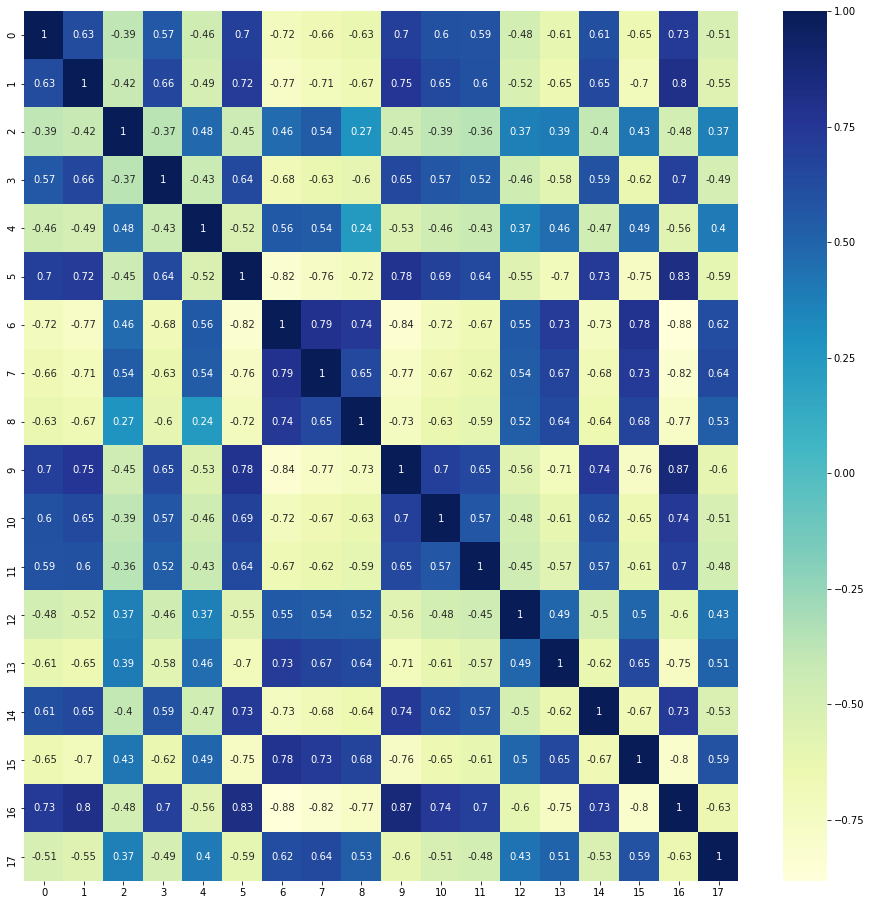

In [10]:
# Dibujo la matriz de correlación
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [59]:
# PROBLEMA DE CLASIFICACIÓN
df["17"].value_counts()

0.0     107427
2.0      27452
1.0      24476
3.0      17311
5.0      10984
4.0       3668
7.0       3297
10.0      2150
8.0       1470
9.0        908
6.0        857
Name: 17, dtype: int64

In [23]:
df2 = df[:,['1','5', '6', '7','8','9','10','13','14','15','16','17']]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,4.0,45810.0,2.0,0.0,0.0,2.0,0.0,2817.0,0.0
1,23.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,2.0,128565.0,15.0,0.0,0.0,4.0,0.0,4498.0,0.0
2,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0,0.0
3,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0,0.0
4,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,10.0
199996,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,5.0
199997,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,3.0
199998,0.0,5.0,0.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0


In [92]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí
df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

In [11]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 
df.drop("0",1,inplace = True)

#### 1. Definir X e y

In [13]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df[['1','2','3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16']])
y = np.array(df['17'])
X.shape

(200000, 16)

In [14]:
y.shape

(200000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [64]:
X_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [6.34220e+04, 1.30000e+01, 0.00000e+00, ..., 3.00000e+00,
        0.00000e+00, 5.12900e+03],
       [2.29205e+05, 2.50000e+01, 0.00000e+00, ..., 6.00000e+00,
        0.00000e+00, 3.61600e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 0.00000e+00],
       [5.71260e+04, 2.30000e+01, 0.00000e+00, ..., 2.00000e+00,
        0.00000e+00, 6.08100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 0.00000e+00]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [16]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [18]:
predictions = model.predict(X_test)
print(predictions)

[0. 2. 2. ... 1. 1. 0.]


#### 6. Sacar métricas, valorar el modelo 

In [19]:
model.score(X_test,y_test)

0.64195

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [41]:
to_pred = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/test_set.csv")

In [42]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [43]:
to_pred_string = df[df.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
to_pred_no_string = df[df.select_dtypes(exclude='object').columns]
to_pred_t = pd. concat([to_pred_no_string,to_pred_string])
to_pred_t = to_pred_t[['1','2','3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16']]
to_pred_t

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,4.0,45810.0,2.0,0.0,0.0,2.0,0.0,2817.0
1,23.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,2.0,128565.0,15.0,0.0,0.0,4.0,0.0,4498.0
2,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0
3,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0
4,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0
199996,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0
199997,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0
199998,0.0,5.0,0.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0


In [44]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred_t = to_pred.fillna(0)

In [45]:
to_pred = to_pred.inverse_transform(to_pred_t)

AttributeError: 'DataFrame' object has no attribute 'inverse_transform'

In [47]:
predictions_submit = model.predict(to_pred_t[['1','2','3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16']])
predictions_submit

ValueError: could not convert string to float: 'a'

In [31]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,6.0,0.0
1,23.0,0.0
2,2.0,0.0
3,32.0,0.0
4,14.0,0.0
...,...,...
199995,0.0,1.0
199996,0.0,2.0
199997,0.0,2.0
199998,0.0,2.0


In [74]:
sample = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/sample_submission.csv")

In [75]:
sample.shape

(133744, 2)

In [76]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!